# First neuron and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X :  (100, 2)
dimension de y :  (100, 1)


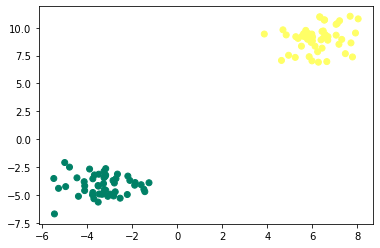

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2)
y = y.reshape((y.shape[0], 1 ))

print('dimension de X : ', X.shape)
print('dimension de y : ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return(W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

To avoid a problem with log(0), we use epsilon that is 1e-15

In [5]:
def log_loss(A, y):
    epsilon = 1e-15
    return -1 / len(y) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    return A>= 0.5

In [8]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [22]:
def neuron(X, y, learning_rate = 0.01 , iter = 1000):
    W, b = initialisation(X)
    
    loss = []
    accuracy = []
    
    for i in range(iter):
        A = model(X, W, b)
        
        loss.append(log_loss(A, y))
        
        y_predictions = predict(X, W, b)
        accuracy.append(accuracy_score(y, y_predictions))
        
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(loss)
    plt.subplot(1, 2, 2)
    plt.plot(accuracy)
    plt.show()
    
    print('accuracy : ' ,accuracy_score(y, y_predictions)*100, '%')
    
    return(W, b)

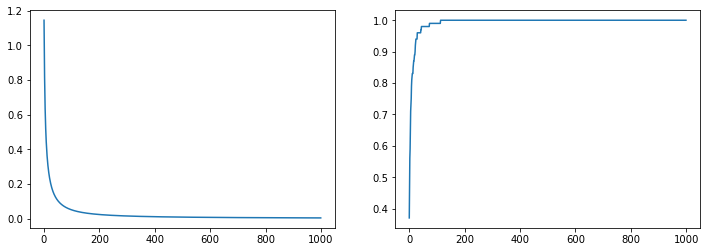

accuracy :  100.0 %


In [23]:
W, b = neuron(X, y)

# Test with photo recognition

## Dataset

In [11]:
!pip install h5py
from utilities import *

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping


In [12]:
x_train, y_train, x_test, y_test = load_data()

In [13]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [14]:
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


## Training of the model

The function works with array of 2 dimensions but with the images, there is 3 dimensions : number of images, pixels on x, pixels on y (1000, 64, 64).
So we need to reshape our dataset to fit.

In [15]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1)
x_train_reshape.shape

(1000, 4096)

In [16]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1)
x_test_reshape.shape

(200, 4096)

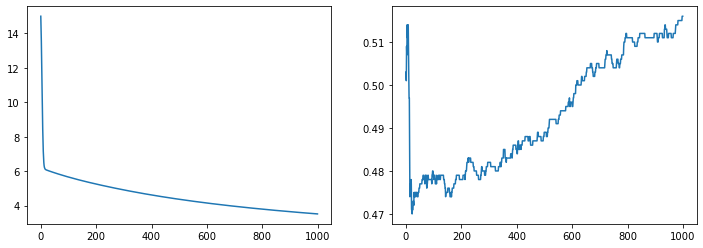

accuracy :  51.6 %


In [24]:
W, b = neuron(x_train_reshape, y_train)

As we can see, the cost function can't converge to a value because the variables are not normalised.
One goes from 16 to 18 and the other from 0 to 100. 

## MinMax normalisation

In [18]:
x_train_reshape = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_train_reshape.shape

(1000, 4096)

In [19]:
x_test_reshape = x_test.reshape(x_test.shape[0], -1) / x_train.max()
x_test_reshape.shape

(200, 4096)

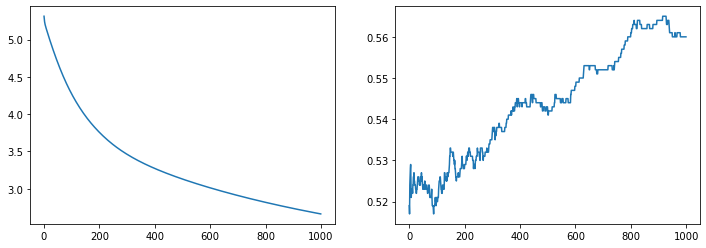

accuracy :  56.00000000000001 %


In [25]:
W, b = neuron(x_train_reshape, y_train)